In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [213]:
def tanhgrad(z):
    grad = 1 - np.tanh(z)**2
    return grad

In [214]:
# importing the iris dataset
data = pd.DataFrame(pd.read_csv("iris.csv"))
data = data.sample(frac=1).reset_index(drop=True)
print(data.head())

   sepal length  sepal width  petal length  petal width            class
0           5.4          3.9           1.7          0.4      Iris-setosa
1           5.3          3.7           1.5          0.2      Iris-setosa
2           6.7          3.1           4.4          1.4  Iris-versicolor
3           5.4          3.7           1.5          0.2      Iris-setosa
4           5.2          3.4           1.4          0.2      Iris-setosa


In [215]:
# numpy matrix formation
X = np.array(data)[:, 0:2].astype(float)
m = np.size(X[:, 0])

# target vector
y = np.zeros([m, 1], dtype = float)
for i, d in enumerate(data['class']):
    if d == 'Iris-setosa':
        y[i, 0] = 1
    else:
        y[i, 0] = 0


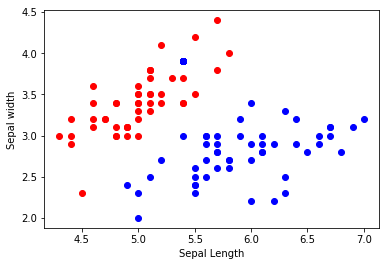

In [216]:
# visualising
plt.plot(X[np.where(y == 1), 0], X[np.where(y == 1), 1], 'or')
plt.plot(X[np.where(y == 0), 0], X[np.where(y == 0), 1], 'ob')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal width")
plt.show()

In [217]:
# initialising weight matrix and bias for layer 1
w1 = np.random.randn(6).reshape(3,2)
b1 = np.zeros([m, 1], dtype = float)
# initialising weight matrix and bias for layer 2
w2 = np.random.randn(3).reshape(3,1)
b2 = b1 = np.zeros([m, 1], dtype = float)

print("w1:\n" + str(w1))
print("\nw2:\n" + str(w2))

w1:
[[-0.81673199 -2.17865171]
 [-0.54683746  0.11350371]
 [ 0.07742256 -0.43680055]]

w2:
[[ 0.3204515 ]
 [ 1.02446017]
 [ 0.11216463]]


In [218]:
# activation layer
a1 = np.zeros([3,1], dtype=float)
#learning rate
L = 0.001

# Training loop
for Iter in range(1000):
    # forward pass
    z1 = np.dot(X, w1.T) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = np.tanh(z2)
    
    # backpropagation
    
    # gradient of cost function w.r.t. a2
    dc2 = a2 - y
    # gradient of cost w.r.t. w2 via a2
    dw2 = (1/m) * np.dot(a1.T, (a2 - y))
    # gradient of cost w.r.t. b2 via a2
    db2 = (1/m) * np.sum(dc2)
    # change in the cost w.r.t a
    dc1a = np.dot(w2, dc2.T)
    dc1b = tanhgrad(z1)
    dc1 = dc1a * dc1b.T
    dw1 = np.dot(dc1, X)
    db1 = (1/m) * np.sum(dc1)
    
    
    # update the weights
    w1 = w1 - L * dw1
    b1 = b1 - L * db1
    w2 = w2 - L * dw2
    b2 = b2 - L * db2

In [219]:
prediction = np.zeros([m, 1])

# predictions
pz1 = np.dot(X, w1.T) + b1
pa1 = np.tanh(z1)
pz2 = np.dot(a1, w2) + b2
pa2 = np.tanh(z2)

for i in range(m):
    if pa2[i, 0] >= 0.5:
        prediction[i, 0] = 1
    else:
        prediction[i, 0] = 0 

In [220]:
# accuracy
score = 0
for i in range(m):
    if y[i] == prediction[i]:
        score+=1
accuracy = (score/m) * 100
print('accuracy: ' + str(accuracy) + "%")

accuracy: 94.0%
